In [1]:
#pip install lifelines

In [2]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("NCCTG_Lung_Cancer_Data.csv", index_col = 0)
data.head()

,X,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
2,2,3,455,2,68,1,0,90,90,1225,15
4,4,5,210,2,57,1,1,90,60,1150,11
6,6,12,1022,1,74,1,1,50,80,513,0
7,7,7,310,2,68,2,2,70,60,384,10
8,8,11,361,2,71,2,2,60,80,538,1


In [4]:
data.shape

(167, 11)

In [5]:
data = data[['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno','pat.karno', 'meal.cal', 'wt.loss']]
data["status"] = data["status"] - 1
data["sex"] = data["sex"] - 1
data.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
2,455,1,68,0,0,90,90,1225,15
4,210,1,57,0,1,90,60,1150,11
6,1022,0,74,0,1,50,80,513,0
7,310,1,68,1,2,70,60,384,10
8,361,1,71,1,2,60,80,538,1


In [6]:
data.dtypes

time         int64
status       int64
age          int64
sex          int64
ph.ecog      int64
ph.karno     int64
pat.karno    int64
meal.cal     int64
wt.loss      int64
dtype: object

In [7]:
data.isnull().sum()

time         0
status       0
age          0
sex          0
ph.ecog      0
ph.karno     0
pat.karno    0
meal.cal     0
wt.loss      0
dtype: int64

In [8]:
data.shape

(167, 9)

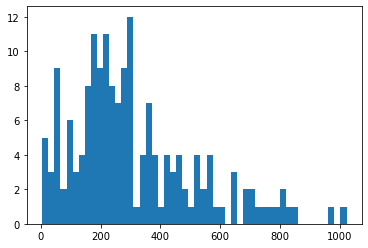

In [9]:
T = data["time"]
E = data["status"]
plt.hist(T, bins = 50)
plt.show()

<AxesSubplot:xlabel='timeline'>

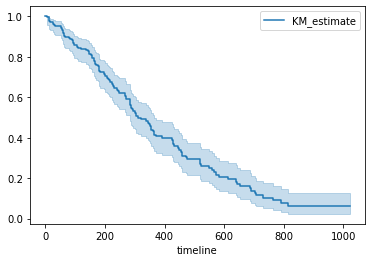

In [10]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

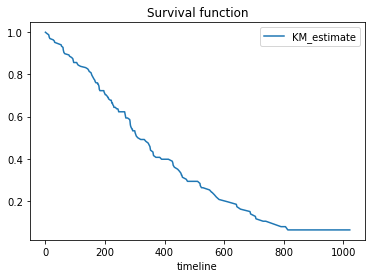

In [11]:
kmf.survival_function_.plot()
plt.title('Survival function')

<AxesSubplot:xlabel='timeline'>

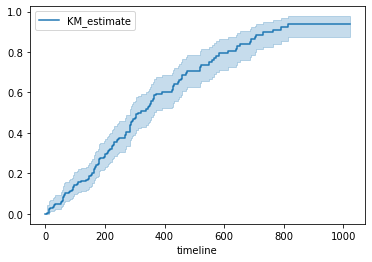

In [12]:
kmf.plot_cumulative_density()

In [13]:
from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)


310.0


In [14]:
print(median_confidence_interval_)

     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   284.0                   363.0


Text(0.5, 1.0, 'Survival of different gender group')

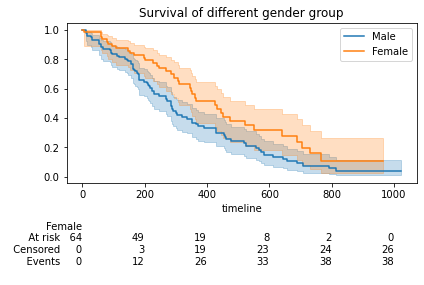

In [15]:
ax = plt.subplot(111)
m = (data["sex"] == 0)
kmf.fit(durations = T[m], event_observed = E[m], label = "Male")
kmf.plot_survival_function(ax = ax)
kmf.fit(T[~m], event_observed = E[~m], label = "Female")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)
plt.title("Survival of different gender group")

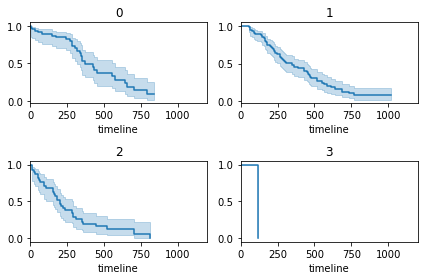

In [16]:
ecog_types = data.sort_values(by = ['ph.ecog'])["ph.ecog"].unique()
for i, ecog_types in enumerate(ecog_types):
  ax = plt.subplot(2, 2, i + 1)
  ix = data['ph.ecog'] == ecog_types
  kmf.fit(T[ix], E[ix], label = ecog_types)
  kmf.plot_survival_function(ax = ax, legend = False)
  plt.title(ecog_types)
  plt.xlim(0, 1200)
plt.tight_layout()

In [17]:
data['ph.ecog'].value_counts()

1    81
0    47
2    38
3     1
Name: ph.ecog, dtype: int64

In [18]:
data = data[data["ph.ecog"] != 3]
data.shape

(166, 9)

In [19]:
data['ph.ecog'].value_counts()

1    81
0    47
2    38
Name: ph.ecog, dtype: int64